In [1]:
import pandas as pd
import numpy as np

In [9]:
from keras.datasets import boston_housing

train_data, test_data = boston_housing.load_data()

In [12]:
(X_train, y_train) = train_data
(X_test, y_test) = test_data

In [15]:
import pandas as pd

df = pd.DataFrame(X_train[0:5])

df["target"] =y_train[0:5]

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
model1 = DecisionTreeRegressor()

model1.fit(X_train, y_train)

DecisionTreeRegressor()

In [18]:
dtpred = model1.predict(X_test)

In [24]:
from sklearn.metrics import r2_score

dt_score = r2_score(y_test, dtpred)
dt_score

0.7547130771335772

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rfmodel = RandomForestRegressor(n_estimators = 200)

rfmodel.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [22]:
rfpred = rfmodel.predict(X_test)

In [25]:
from sklearn.metrics import r2_score

rf_score = r2_score(y_test, rfpred)

rf_score

0.8326462966207081

Text(0.5, 1.0, 'Comparing the R2 scores')

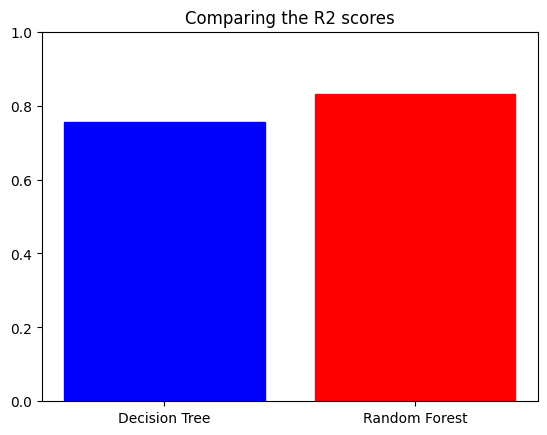

In [27]:
import matplotlib.pyplot as plt

bar = plt.bar(["Decision Tree", "Random Forest"],[dt_score, rf_score])
bar[0].set_color("blue")
bar[1].set_color("red")
plt.ylim([0 , 1])
plt.title("Comparing the R2 scores")

In [28]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.datasets import boston_housing


(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()


scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)


X_train, X_val, y_train, y_val = train_test_split(train_data, train_targets, test_size=0.2, random_state=42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))





Epoch 1/100
11/11 [==============================] - 2s 39ms/step - loss: 578.2021 - val_loss: 416.4787
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 517.3783 - val_loss: 365.4747
Epoch 3/100
11/11 [==============================] - 0s 10ms/step - loss: 448.7750 - val_loss: 306.1866
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 364.0227 - val_loss: 236.6710
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 268.3078 - val_loss: 164.8855
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 175.2142 - val_loss: 106.0570
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 113.1796 - val_loss: 70.1043
Epoch 8/100
11/11 [==============================] - 0s 9ms/step - loss: 82.5148 - val_loss: 51.2568
Epoch 9/100
11/11 [==============================] - 0s 12ms/step - loss: 64.7521 - val_loss: 39.0986
Epoch 10/100
11/11 [==============================] - 0s 8ms/step - loss: 

In [29]:
mse = model.evaluate(test_data, test_targets)
print(f'Test Mean Squared Error: {mse:.4f}')


predictions = model.predict(test_data)


mse_predictions = mean_squared_error(test_targets, predictions)
print(f'Mean Squared Error on Predictions: {mse_predictions:.4f}')


4/4 [==============================] - 0s 4ms/step - loss: 21.7930
Test Mean Squared Error: 21.7930
4/4 [==============================] - 0s 5ms/step
Mean Squared Error on Predictions: 21.7930
